## (1) 인공 지능 모델의 목적

4가지 특징으로 개와 늑대를 판정하는 인공 지능 모델을 구현하라

입력: 4가지 특징 $(x_1, x_2, x_3, x_4)$
출력: 개와 늑대의 확률 $(y_1, y_2)$

예) 꼬리 $(x_1)$, 귀 $(x_2)$, 코 $(x_3)$, 다리 길이 $(x_4)$를 가지고 개일 확률 $(y_1)$과 늑대일 확률  $(y_2)$를 예측

## (2) 인공 지능 모델 선정

퍼셉트론

* 입력 layer의 개수: $D_{in}$
* 입력 layer: 4개의 입력: $(x_1, x_2, x_3, x_4)$

* 출력 layer의 개수: $D_{out}$
* 출력 layer: 2개의 출력: $(y_1, y_2)$

* $W$: $(D_{in} \times D_{out})$

* 데이터의 개수 $(m)$: 64개

## (3) 데이터 수집

In [1]:
import numpy as np


N, Din, Dout = 64, 4, 2

x = np.random.randn(N, Din)
y = np.random.randn(N, Dout)
w = np.random.randn(Din, Dout)

## (4) 손실 함수 결정

$$
J(W) = \frac{1}{2} \sum || \hat y - y ||^2
$$

## (5) 훈련

(5-1) 예측 값 계산
$$
\hat{y} = W^T X
$$

(5-2) 오류 (loss) 계산
$$
J(W) = \frac{1}{2} \sum || \hat y - y ||^2
$$

(5-3) 경사 하강법 (gradient descent) 적용
$$
\begin{align}
\frac{\partial J}{\partial W} &= \frac{\partial J}{\partial \hat y} \frac{\partial \hat y}{\partial W} \\
&= \frac{\partial}{\partial \hat y} ( \frac{1}{2}\sum||\hat y - y||^2 ) \frac{\partial}{\partial W}  (W^T X) \\
&= (\hat y - y)X
\end{align}
$$

(5-4) W 갱신
$$
W = W - \alpha \frac{\partial J}{\partial W}
$$

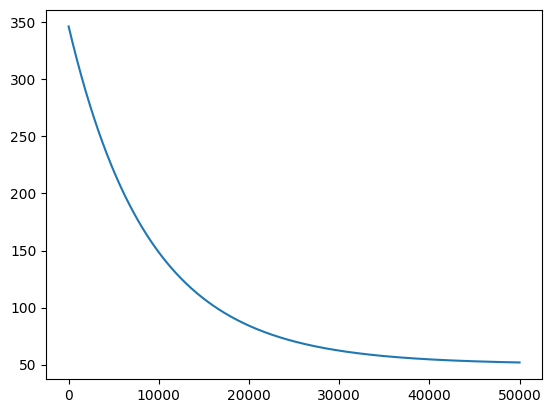

In [2]:
import numpy as np
import matplotlib.pyplot as plt


N, Din, Dout = 64, 4, 2

x = np.random.randn(N, Din)
y = np.random.randn(N, Dout)
w = np.random.randn(Din, Dout)

lr = 1e-6
loss_arr = []

for t in range(50000):
    # 5-1. 예측 값을 계산
    y_hat = np.matmul(x, w)

    # 5-2. loss 계산
    loss = (0.5 * (y_hat - y) ** 2).sum()
    loss_arr.append(loss)

    # 5-3. 경사하강법 적용
    grad_y_hat = y_hat - y
    grad_w = np.matmul(x.T, grad_y_hat)

    # 5-4. w를 갱신
    w -= lr * grad_w


plt.plot(loss_arr)
